In [1]:
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import pandas as pd
import re
from sklearn.decomposition import LatentDirichletAllocation,PCA
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
nltk.download('wordnet')# Gettnig rid of unnecessary warnings
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.utils import shuffle



import warnings; 
warnings.simplefilter('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akhilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
model = pd.read_csv("C:/Users/Akhilesh/Downloads/Decat/output_scraping.csv")

In [3]:
model.head()

Url  \
0  https://sportsadvice.decathlon.in/advice-alias...   
1  https://sportsadvice.decathlon.in/advice-alias...   
2  https://sportsadvice.decathlon.in/advice-alias...   
3  https://sportsadvice.decathlon.in/advice-alias...   
4  https://sportsadvice.decathlon.in/advice-alias...   

                                             article       tag  
0  With many many difficult experiences while hik...  Trekking  
1  Ladies, before a hike, do you always have one ...  Trekking  
2  "Coming from a place surrounded by surreal hil...  Trekking  
3  My love for nature began early and remains und...  Trekking  
4  She was 6!!! Yes, that's when she began. Pract...  Trekking

In [4]:
for c in list(model.columns):
    
    # get a list of unique values
    n = model[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

Url
['https://sportsadvice.decathlon.in/advice-alias/feminine-hygiene-hike-tp_9223']
article: 126 unique values
tag
['Trekking' 'Swimming']


In [5]:
model.shape

(132, 3)

In [6]:
def alter_desc(st):
    st=st.replace('\n',' ').replace('\r','')
    st=st.replace("-"," ")
    st=re.sub(r"[.,/?\'\"\\;:\[\]{}!@#$^()]+"," ",st,re.DOTALL|re.U|re.I)
    st=re.sub(r"[a-z0-9]{1} "," ",st)
    return st.lower()

In [7]:
Target=model['tag']

In [8]:
wnl=WordNetLemmatizer()
text=model['article']
model['article'] =[" ".join([wnl.lemmatize(word,pos='v') for word in sent.split(" ")]) for sent in model['article']]
model['article']

0      With many many difficult experience while hiki...
1      Ladies, before a hike, do you always have one ...
2      "Coming from a place surround by surreal hill ...
3      My love for nature begin early and remain unda...
4      She be 6!!! Yes, that's when she began. Practi...
5      My first trek have teach me many things, one o...
6      Things to keep handy: - Antibacterial wipe for...
7      - Do not stop yourself when nature calls. That...
8      - Change your underwear every day. Twice, if i...
9      This be a bitch, especially if you be prone to...
10     a. I consult my gynecologist for pills to dela...
11                                   b. I deal with it. 
12                                                #NAME?
13                                                #NAME?
14                                                #NAME?
15                                                #NAME?
16                                                #NAME?
17     Keep your medications ha

In [9]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

In [10]:
overall=[]
nodigi=[]

for word in model['article']:
    new_words=word_tokenize(word)
    filtered_sentence = [" ".join([w for w in new_words if not w in stop_words])]
    overall.append(filtered_sentence)

In [11]:
df = pd.DataFrame(overall,columns=["text"])
df

text
0    With many many difficult experience hiking , A...
1    Ladies , hike , always one pertinent question ...
2    `` Coming place surround surreal hill forests ...
3    My love nature begin early remain undaunted . ...
4    She 6 ! ! ! Yes , 's began . Practically bring...
5    My first trek teach many things , one importan...
6    Things keep handy : - Antibacterial wipe lady ...
7    - Do stop nature calls . That would cause prob...
8      - Change underwear every day . Twice , 's hot .
9    This bitch , especially prone extreme cramps ....
10   a. I consult gynecologist pills delay periods ...
11                                         b. I deal .
12                                            # NAME ?
13                                            # NAME ?
14                                            # NAME ?
15                                            # NAME ?
16                                            # NAME ?
17   Keep medications handy , never forget . Same g...
18   Know environment head . Its always better safe...
19   Ladies , walk wild got ta go ... well got ta g...
20   You probably wo n't pleasure toilet every hike...
21   If rocky terrain , easy . Take cover behind ro...
22                   Do squat low , pain gain ladies .
23   I understand take shower always option 're hik...
24   If water available 're camp group people day t...
25   There 3 criteria determine choice waterproof j...
26   In mountains , weather change quickly 're advi...
27   Choosing right jacket n't straightforward matt...
28   Depending level protection need , choose diffe...
29                                   SHOWER PROTECTION
..                                                 ...
102  It allow burn 300 500 kcal per session , whils...
103  Run pool group . Equipped weight belt gilet , ...
104  There multiple benefit body : thank water pres...
105  It 's traditional yoga , water ! You submerge ...
106  No need able swim perfectly season yogi ! As p...
107  It 's pool version body-combat . A mix move in...
108  Is , without doubt , activity help tone body m...
109  To make sure , important underline importance ...
110  Swimming direction , hygiene , manners , today...
111  As probably noticed , swim direction pool Indi...
112  However , even vast majority people know , swi...
113  It also important note get wall , must make tu...
114  When pool crowd peak times , best organise tra...
115  For successful workout even full lane , avoid ...
116  In term train equipment , crowd swim pool some...
117                                 “ Why wear cap ? ”
118              “ I n't need wash , I 'm get pool ! ”
119                 `` Bermuda short like swimsuit ! ”
120                             Who never hear words ?
121  Yet hygiene rule lay ensure maximum enjoyment ...
122  To avoid kind complication , necessary comply ...
123  Sometimes swimmer may little slower , another ...
124  In cases , assume accident report swimsuit , c...
125  To avoid kinds clashes , important never stop ...
126  Finally , swimmer overtake , accelerate ! It c...
127  In public swim pools , lanes often divide swim...
128  Before get water , take time observe equipment...
129  There point overestimate . If , water , may di...
130  It crystal clear apart basics share pool , wou...
131  All together `` swimming session '' always rhy...

[132 rows x 1 columns]

In [12]:
fin_text=[]

for st in df["text"]:
    new=re.sub('[^A-Za-z0-9]+', ' ', st)
    fin_text.append(new)

In [13]:
new_text=pd.DataFrame(fin_text,columns=["text"])
new_text

text
0    With many many difficult experience hiking Aun...
1    Ladies hike always one pertinent question hygi...
2     Coming place surround surreal hill forests s ...
3    My love nature begin early remain undaunted A ...
4    She 6 Yes s began Practically bring hill Assam...
5    My first trek teach many things one important ...
6    Things keep handy Antibacterial wipe lady part...
7     Do stop nature calls That would cause problem...
8              Change underwear every day Twice s hot 
9    This bitch especially prone extreme cramps I 2...
10   a I consult gynecologist pills delay periods t...
11                                           b I deal 
12                                               NAME 
13                                               NAME 
14                                               NAME 
15                                               NAME 
16                                               NAME 
17   Keep medications handy never forget Same go so...
18   Know environment head Its always better safe s...
19     Ladies walk wild got ta go well got ta go wild 
20   You probably wo n t pleasure toilet every hike...
21   If rocky terrain easy Take cover behind rock s...
22                      Do squat low pain gain ladies 
23   I understand take shower always option re hike...
24   If water available re camp group people day tw...
25   There 3 criteria determine choice waterproof j...
26   In mountains weather change quickly re advise ...
27   Choosing right jacket n t straightforward matt...
28   Depending level protection need choose differe...
29                                   SHOWER PROTECTION
..                                                 ...
102  It allow burn 300 500 kcal per session whilst ...
103  Run pool group Equipped weight belt gilet star...
104  There multiple benefit body thank water pressu...
105  It s traditional yoga water You submerge pool ...
106  No need able swim perfectly season yogi As pre...
107  It s pool version body combat A mix move inspi...
108  Is without doubt activity help tone body make ...
109  To make sure important underline importance go...
110  Swimming direction hygiene manners today Nabai...
111  As probably noticed swim direction pool Indian...
112  However even vast majority people know swimmer...
113  It also important note get wall must make turn...
114  When pool crowd peak times best organise train...
115  For successful workout even full lane avoid bu...
116  In term train equipment crowd swim pool someti...
117                                      Why wear cap 
118                      I n t need wash I m get pool 
119                       Bermuda short like swimsuit 
120                              Who never hear words 
121  Yet hygiene rule lay ensure maximum enjoyment ...
122  To avoid kind complication necessary comply hy...
123  Sometimes swimmer may little slower another co...
124  In cases assume accident report swimsuit compo...
125  To avoid kinds clashes important never stop mi...
126  Finally swimmer overtake accelerate It competi...
127  In public swim pools lanes often divide swim l...
128  Before get water take time observe equipment t...
129  There point overestimate If water may disturb ...
130  It crystal clear apart basics share pool would...
131  All together swimming session always rhyme per...

[132 rows x 1 columns]

In [14]:
all_sent=[]
for sen in new_text["text"]:
    sent=re.sub('[0-9]+', '', sen)
    all_sent.append(sent)

In [15]:
final_cleantext=pd.DataFrame(all_sent,columns=["texts"])
final_cleantext

texts
0    With many many difficult experience hiking Aun...
1    Ladies hike always one pertinent question hygi...
2     Coming place surround surreal hill forests s ...
3    My love nature begin early remain undaunted A ...
4    She  Yes s began Practically bring hill Assam ...
5    My first trek teach many things one important ...
6    Things keep handy Antibacterial wipe lady part...
7     Do stop nature calls That would cause problem...
8              Change underwear every day Twice s hot 
9    This bitch especially prone extreme cramps I  ...
10   a I consult gynecologist pills delay periods t...
11                                           b I deal 
12                                               NAME 
13                                               NAME 
14                                               NAME 
15                                               NAME 
16                                               NAME 
17   Keep medications handy never forget Same go so...
18   Know environment head Its always better safe s...
19     Ladies walk wild got ta go well got ta go wild 
20   You probably wo n t pleasure toilet every hike...
21   If rocky terrain easy Take cover behind rock s...
22                      Do squat low pain gain ladies 
23   I understand take shower always option re hike...
24   If water available re camp group people day tw...
25   There  criteria determine choice waterproof ja...
26   In mountains weather change quickly re advise ...
27   Choosing right jacket n t straightforward matt...
28   Depending level protection need choose differe...
29                                   SHOWER PROTECTION
..                                                 ...
102  It allow burn   kcal per session whilst lower ...
103  Run pool group Equipped weight belt gilet star...
104  There multiple benefit body thank water pressu...
105  It s traditional yoga water You submerge pool ...
106  No need able swim perfectly season yogi As pre...
107  It s pool version body combat A mix move inspi...
108  Is without doubt activity help tone body make ...
109  To make sure important underline importance go...
110  Swimming direction hygiene manners today Nabai...
111  As probably noticed swim direction pool Indian...
112  However even vast majority people know swimmer...
113  It also important note get wall must make turn...
114  When pool crowd peak times best organise train...
115  For successful workout even full lane avoid bu...
116  In term train equipment crowd swim pool someti...
117                                      Why wear cap 
118                      I n t need wash I m get pool 
119                       Bermuda short like swimsuit 
120                              Who never hear words 
121  Yet hygiene rule lay ensure maximum enjoyment ...
122  To avoid kind complication necessary comply hy...
123  Sometimes swimmer may little slower another co...
124  In cases assume accident report swimsuit compo...
125  To avoid kinds clashes important never stop mi...
126  Finally swimmer overtake accelerate It competi...
127  In public swim pools lanes often divide swim l...
128  Before get water take time observe equipment t...
129  There point overestimate If water may disturb ...
130  It crystal clear apart basics share pool would...
131  All together swimming session always rhyme per...

[132 rows x 1 columns]

In [16]:
final_cleantext = final_cleantext.reset_index(drop=True)
final_text = model.reset_index(drop=True)
final_text

Url  \
0    https://sportsadvice.decathlon.in/advice-alias...   
1    https://sportsadvice.decathlon.in/advice-alias...   
2    https://sportsadvice.decathlon.in/advice-alias...   
3    https://sportsadvice.decathlon.in/advice-alias...   
4    https://sportsadvice.decathlon.in/advice-alias...   
5    https://sportsadvice.decathlon.in/advice-alias...   
6    https://sportsadvice.decathlon.in/advice-alias...   
7    https://sportsadvice.decathlon.in/advice-alias...   
8    https://sportsadvice.decathlon.in/advice-alias...   
9    https://sportsadvice.decathlon.in/advice-alias...   
10   https://sportsadvice.decathlon.in/advice-alias...   
11   https://sportsadvice.decathlon.in/advice-alias...   
12   https://sportsadvice.decathlon.in/advice-alias...   
13   https://sportsadvice.decathlon.in/advice-alias...   
14   https://sportsadvice.decathlon.in/advice-alias...   
15   https://sportsadvice.decathlon.in/advice-alias...   
16   https://sportsadvice.decathlon.in/advice-alias...   
17   https://sportsadvice.decathlon.in/advice-alias...   
18   https://sportsadvice.decathlon.in/advice-alias...   
19   https://sportsadvice.decathlon.in/advice-alias...   
20   https://sportsadvice.decathlon.in/advice-alias...   
21   https://sportsadvice.decathlon.in/advice-alias...   
22   https://sportsadvice.decathlon.in/advice-alias...   
23   https://sportsadvice.decathlon.in/advice-alias...   
24   https://sportsadvice.decathlon.in/advice-alias...   
25   https://sportsadvice.decathlon.in/advice-alias...   
26   https://sportsadvice.decathlon.in/advice-alias...   
27   https://sportsadvice.decathlon.in/advice-alias...   
28   https://sportsadvice.decathlon.in/advice-alias...   
29   https://sportsadvice.decathlon.in/advice-alias...   
..                                                 ...   
102  https://sportsadvice.decathlon.in/advice-alias...   
103  https://sportsadvice.decathlon.in/advice-alias...   
104  https://sportsadvice.decathlon.in/advice-alias...   
105  https://sportsadvice.decathlon.in/advice-alias...   
106  https://sportsadvice.decathlon.in/advice-alias...   
107  https://sportsadvice.decathlon.in/advice-alias...   
108  https://sportsadvice.decathlon.in/advice-alias...   
109  https://sportsadvice.decathlon.in/advice-alias...   
110  https://sportsadvice.decathlon.in/advice-alias...   
111  https://sportsadvice.decathlon.in/advice-alias...   
112  https://sportsadvice.decathlon.in/advice-alias...   
113  https://sportsadvice.decathlon.in/advice-alias...   
114  https://sportsadvice.decathlon.in/advice-alias...   
115  https://sportsadvice.decathlon.in/advice-alias...   
116  https://sportsadvice.decathlon.in/advice-alias...   
117  https://sportsadvice.decathlon.in/advice-alias...   
118  https://sportsadvice.decathlon.in/advice-alias...   
119  https://sportsadvice.decathlon.in/advice-alias...   
120  https://sportsadvice.decathlon.in/advice-alias...   
121  https://sportsadvice.decathlon.in/advice-alias...   
122  https://sportsadvice.decathlon.in/advice-alias...   
123  https://sportsadvice.decathlon.in/advice-alias...   
124  https://sportsadvice.decathlon.in/advice-alias...   
125  https://sportsadvice.decathlon.in/advice-alias...   
126  https://sportsadvice.decathlon.in/advice-alias...   
127  https://sportsadvice.decathlon.in/advice-alias...   
128  https://sportsadvice.decathlon.in/advice-alias...   
129  https://sportsadvice.decathlon.in/advice-alias...   
130  https://sportsadvice.decathlon.in/advice-alias...   
131  https://sportsadvice.decathlon.in/advice-alias...   

                                               article       tag  
0    With many many difficult experience while hiki...  Trekking  
1    Ladies, before a hike, do you always have one ...  Trekking  
2    "Coming from a place surround by surreal hill ...  Trekking  
3    My love for nature begin early and remain unda...  Trekking  
4    She be 6!!! Yes, that's when she began. Practi...  Trekking  
5    My first trek have teach me many things, one o.

(array([44., 20., 21., 20.,  8., 12.,  3.,  1.,  2.,  1.]),
 array([  6. ,  74.7, 143.4, 212.1, 280.8, 349.5, 418.2, 486.9, 555.6,
        624.3, 693. ]),
 <a list of 10 Patch objects>)

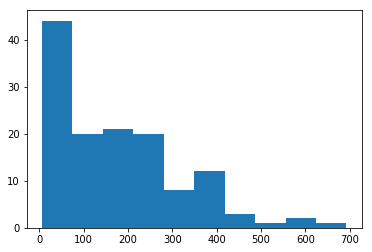

In [56]:
final_text['article_len'] = final_text['article'].astype(str).apply(len)
plt.hist(final_text['article_len'])

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


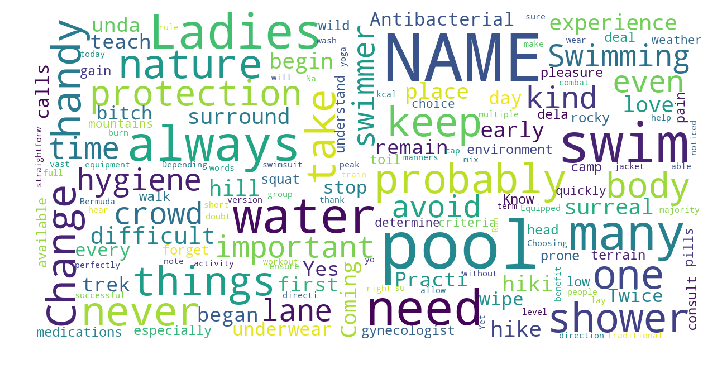

In [41]:
show_wordcloud(final_text['article'])

In [48]:
Trekking = final_text[final_text['tag']=="Trekking"]
Swimming = final_text[final_text['tag']=="Swimming"]

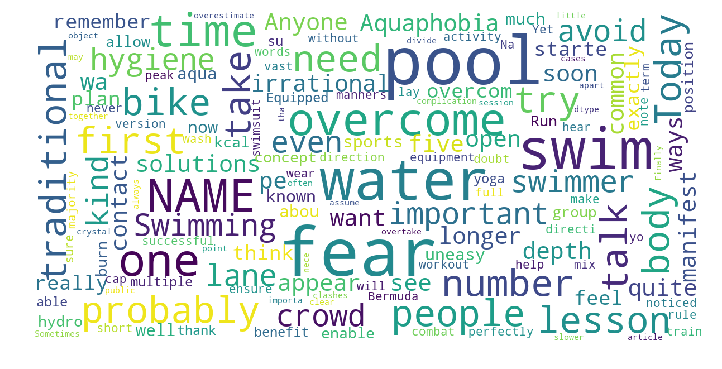

In [49]:
show_wordcloud(Swimming['article'])

In [51]:
show_wordcloud(Trekking['article'])

In [17]:
final_cleantext['Target']=model['tag']

In [18]:
vectorizer = CountVectorizer(min_df = 0.05 , max_df= 0.95, stop_words="english")
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.95, max_features=None, min_df=0.05,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [19]:
features1 = pd.DataFrame(vectorizer.fit_transform(final_cleantext['texts']).toarray(),columns=vectorizer.get_feature_names())
features1.head()

avoid  body  choose  fabric  fear  help  hike  important  jacket  jackets  \
0      0     0       0       0     0     0     0          0       0        0   
1      0     0       0       0     0     0     1          0       0        0   
2      0     0       0       0     0     0     1          0       0        0   
3      0     0       0       0     0     0     0          0       0        0   
4      0     0       0       0     0     1     0          0       0        0   

   ...   protection  shower  swim  swimmers  time  use  water  waterproof  \
0  ...            0       0     0         0     0    0      0           0   
1  ...            0       0     0         0     0    0      0           0   
2  ...            0       0     0         0     1    0      0           0   
3  ...            0       0     0         0     0    0      0           0   
4  ...            0       0     0         0     1    0      0           0   

   waterproofing  wear  
0              0     0  
1              0     0  
2              0     0  
3              0     0  
4              0     0  

[5 rows x 23 columns]

In [20]:
features1.to_csv("C:/Users/Akhilesh/Downloads/Decat/final.csv")

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features1, final_cleantext['Target'],test_size=0.30)


In [22]:
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

model.fit(X_train,y_train)
model.score(X_test,y_test)



0.875

In [23]:
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
results=logisticreg.fit(X_train, y_train)
Ylogistic = logisticreg.predict(X_test)

In [24]:
print(logisticreg.coef_,logisticreg.get_params)

[[ 7.44424085e-04 -5.05771151e-04  4.92894498e-04  2.48509677e-03
  -2.25307428e-03  2.44340199e-04  1.98792043e-03  4.95218145e-04
   3.71831100e-03  1.98473092e-03 -9.49366822e-06  2.23425946e-03
  -1.50331374e-03  1.73865717e-03  4.92854432e-04 -2.50025762e-03
  -1.50016268e-03 -5.92860483e-06  4.92687508e-04 -1.02199726e-03
   2.22883360e-03  2.23296366e-03  2.40699346e-04]] <bound method BaseEstimator.get_params of LogisticRegression(C=0.0005, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=1e-07, verbose=0, warm_start=False)>


In [25]:
print("Accuracy of the Logistic regression model:" ,logisticreg.score(X_test, y_test))

Accuracy of the Logistic regression model: 0.55


In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Ylogistic))

[[ 1 18]
 [ 0 21]]


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, Ylogistic), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Ylogistic, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       1.00      0.05      0.10        19
         YES       0.54      1.00      0.70        21

   micro avg       0.55      0.55      0.55        40
   macro avg       0.77      0.53      0.40        40
weighted avg       0.76      0.55      0.42        40



In [29]:
Y_score = logisticreg.decision_function(X_test)
Y_score

array([ 0.00740166,  0.00988676,  0.00740166,  0.00087278,  0.00740166,
        0.00637967,  0.00412659,  0.00137322,  0.00740166,  0.01381725,
        0.00988676, -0.00238317,  0.00138356,  0.01058782,  0.00938365,
        0.00788739,  0.01135482,  0.00812738,  0.00514859,  0.00736537,
        0.00214826,  0.00087278,  0.01062669,  0.00387941,  0.00938958,
        0.00740166,  0.00740166,  0.00412659,  0.00740166,  0.00487635,
        0.00789452,  0.02847084,  0.01012808,  0.00289487,  0.00938958,
        0.00714114,  0.00589835,  0.00740166,  0.00339809,  0.00988676])

In [30]:
import numpy as np
import pandas as pd
#from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [31]:
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [32]:
ypreddt = clfgini.predict(X_test)
ypreddt

array(['Trekking', 'Trekking', 'Trekking', 'Swimming', 'Trekking',
       'Trekking', 'Swimming', 'Swimming', 'Trekking', 'Swimming',
       'Trekking', 'Swimming', 'Swimming', 'Swimming', 'Trekking',
       'Trekking', 'Trekking', 'Trekking', 'Swimming', 'Trekking',
       'Swimming', 'Swimming', 'Trekking', 'Swimming', 'Trekking',
       'Trekking', 'Trekking', 'Swimming', 'Trekking', 'Trekking',
       'Trekking', 'Trekking', 'Trekking', 'Trekking', 'Trekking',
       'Trekking', 'Trekking', 'Trekking', 'Swimming', 'Trekking'],
      dtype=object)

In [33]:
print( "Accuracy is ", accuracy_score(y_test,ypreddt)*100)

Accuracy is  75.0


In [34]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)



y_pred = model.predict(X_test)
model.score(X_test,y_test)

accuracy_score(y_test,y_pred)


0.925